## Linear Regression Model on taxis dataset

In [1]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#getting pre-defined datasets from seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
#loading the dataset
data = sns.load_dataset('taxis')

In [4]:
#Checking the columns
data.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [5]:
data=data[['passengers','distance','fare','tip','tolls','total','color','payment']]

In [6]:
#Checking the data types
data.dtypes

passengers      int64
distance      float64
fare          float64
tip           float64
tolls         float64
total         float64
color          object
payment        object
dtype: object

In [7]:
# getting the 1st five fields of data
data.head()

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card


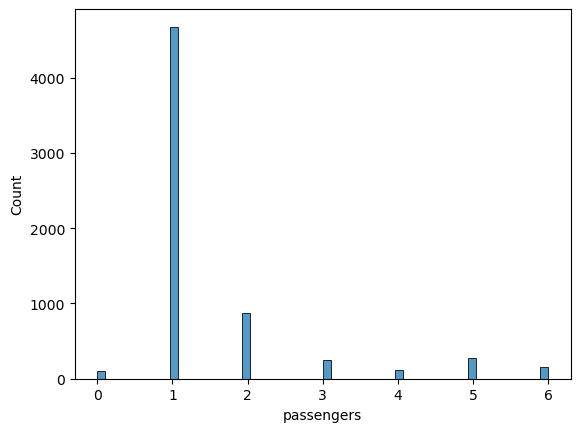

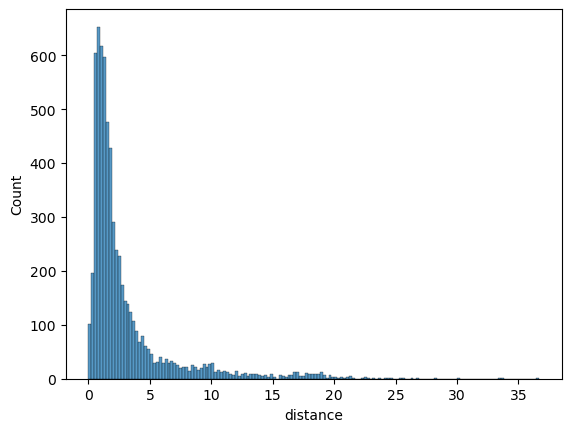

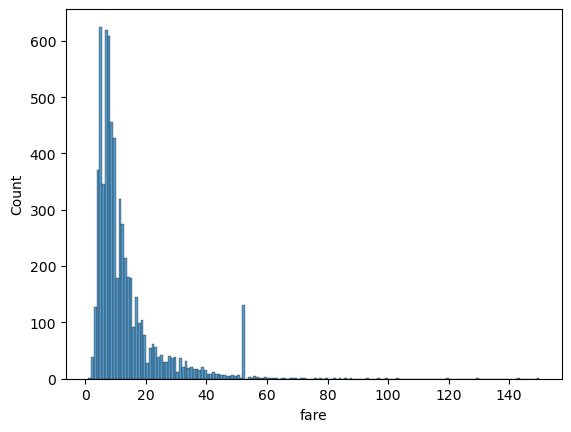

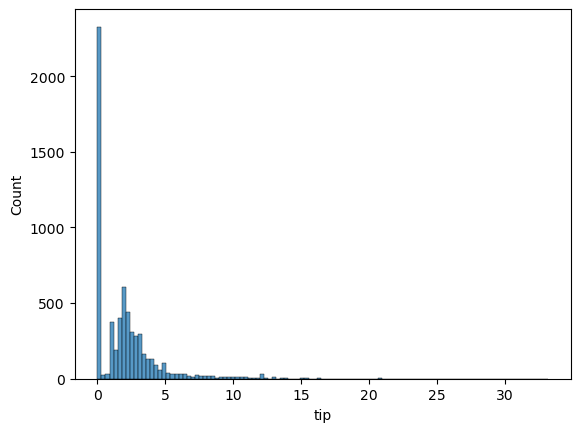

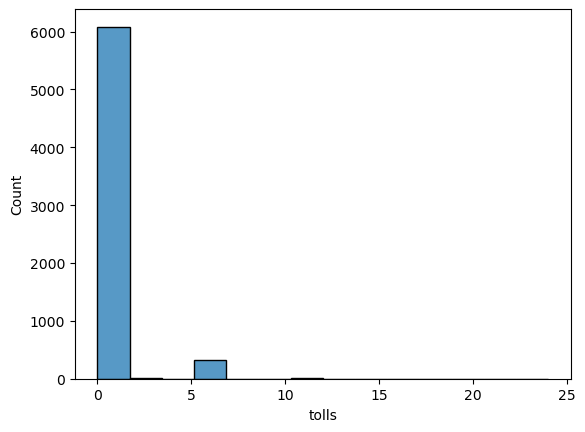

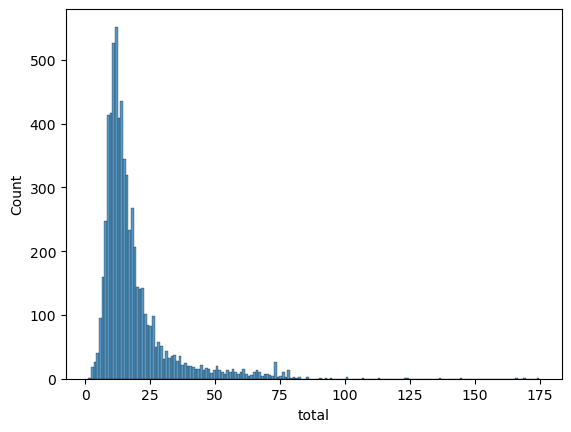

In [8]:
# plotting the histogram of columns having data types [Integer ad Float]
for i in data.select_dtypes(['int','float']):
    sns.histplot(data=data,x=i)
    plt.show()

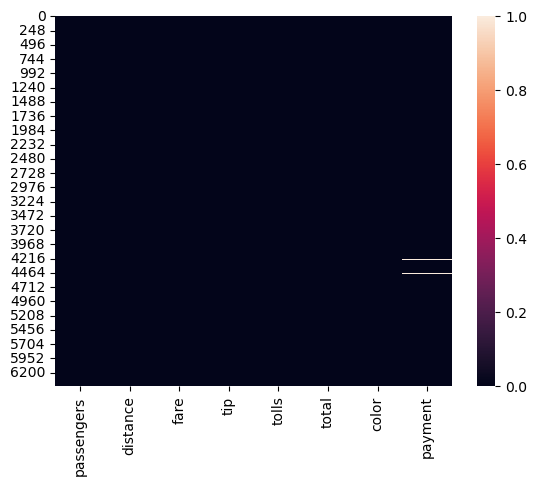

In [9]:
#Plotting heapmap
sns.heatmap(data.isnull())
plt.show()

In [10]:
# Checking for null Values
data.isnull().sum()

passengers     0
distance       0
fare           0
tip            0
tolls          0
total          0
color          0
payment       44
dtype: int64

In [11]:
data['payment'].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [12]:
#filling value using fillna function
data['payment'].fillna('credit card',inplace=True)

In [13]:
data.isnull().sum()

passengers    0
distance      0
fare          0
tip           0
tolls         0
total         0
color         0
payment       0
dtype: int64

# Handle the categorical data

In [14]:
#LabelEncoder - used to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [15]:
#Creating object
LE=LabelEncoder()

In [16]:
#converting into numerical data
data['color']=LE.fit_transform(data['color'])

In [17]:
data['payment']=LE.fit_transform(data['payment'])

In [18]:
data.head()

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,1,1
1,1,0.79,5.0,0.00,0.0,9.30,1,0
2,1,1.37,7.5,2.36,0.0,14.16,1,1
3,1,7.70,27.0,6.15,0.0,36.95,1,1
4,3,2.16,9.0,1.10,0.0,13.40,1,1


# seperate out the independent and dependent variable

In [19]:
x=data.drop('fare',axis=1).values#independent variable
y=data['fare'].values#dependent feature
#values -- to convert into arrays

In [20]:
x

array([[ 1.  ,  1.6 ,  2.15, ..., 12.95,  1.  ,  1.  ],
       [ 1.  ,  0.79,  0.  , ...,  9.3 ,  1.  ,  0.  ],
       [ 1.  ,  1.37,  2.36, ..., 14.16,  1.  ,  1.  ],
       ...,
       [ 1.  ,  4.14,  0.  , ..., 17.3 ,  0.  ,  0.  ],
       [ 1.  ,  1.12,  0.  , ...,  6.8 ,  0.  ,  1.  ],
       [ 1.  ,  3.85,  3.36, ..., 20.16,  0.  ,  1.  ]])

In [21]:
y

array([ 7. ,  5. ,  7.5, ..., 16. ,  6. , 15. ])

# Split the data into training and testing

In [22]:
# dividing the data into training and testing set 
from sklearn.model_selection import train_test_split

In [23]:
train_test_split(x,y,test_size=0.20,random_state=0)

[array([[ 1.  ,  1.29,  0.  , ...,  8.3 ,  1.  ,  0.  ],
        [ 5.  ,  1.39,  1.5 , ..., 12.8 ,  1.  ,  1.  ],
        [ 0.  ,  1.1 ,  0.  , ..., 10.3 ,  1.  ,  1.  ],
        ...,
        [ 1.  ,  0.42,  1.66, ...,  9.96,  1.  ,  1.  ],
        [ 2.  ,  0.48,  0.  , ...,  9.8 ,  1.  ,  0.  ],
        [ 1.  ,  3.22,  0.  , ..., 15.8 ,  1.  ,  0.  ]]),
 array([[ 3.  , 18.06, 13.11, ..., 78.67,  1.  ,  1.  ],
        [ 0.  ,  1.4 ,  3.85, ..., 23.15,  1.  ,  1.  ],
        [ 2.  ,  1.27,  0.  , ...,  9.3 ,  1.  ,  0.  ],
        ...,
        [ 1.  ,  0.94,  1.32, ..., 10.12,  1.  ,  1.  ],
        [ 2.  ,  0.65,  0.  , ...,  8.3 ,  1.  ,  0.  ],
        [ 6.  ,  1.11,  0.  , ...,  7.8 ,  0.  ,  0.  ]]),
 array([ 7. ,  7. ,  7. , ...,  5. ,  6.5, 12. ]),
 array([52. , 16. ,  6. , ...,  5.5,  5. ,  6. ])]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
len(x_train)

5146

In [26]:
len(x_test)

1287

# Training the Model

In [27]:
# Importing LinearRegression from scikit Learn
from sklearn.linear_model import LinearRegression

In [28]:
# Making object
LR=LinearRegression()

In [29]:
#Fit linear model
LR.fit(x_train,y_train)

LinearRegression()

# Checking the model

In [30]:
model_pred=LR.predict(x_test)

In [31]:
# 1st five Predictions of model
model_pred[:5]

array([56.19774387, 15.57208475,  5.95433051,  4.80687537, 17.22967885])

In [32]:
# 1st five actual values
y_test[:5]

array([52., 16.,  6.,  5., 17.])

In [33]:
residual = y_test - model_pred

In [34]:
residual

array([-4.19774387,  0.42791525,  0.04566949, ...,  0.11434852,
        0.08673107, -0.34102054])

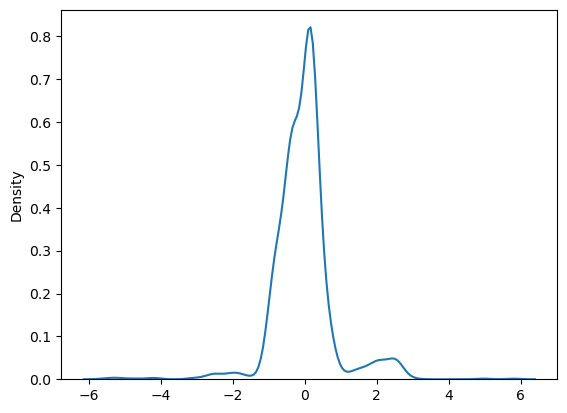

In [35]:
sns.kdeplot(residual)
plt.show()

In [36]:
#Making the single prediction by giving values 
LR.predict([[2,2,3,0,1,0,1]])

array([-3.40780031])

In [37]:
data.head()

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,1,1
1,1,0.79,5.0,0.00,0.0,9.30,1,0
2,1,1.37,7.5,2.36,0.0,14.16,1,1
3,1,7.70,27.0,6.15,0.0,36.95,1,1
4,3,2.16,9.0,1.10,0.0,13.40,1,1


# Evaluate the Model 

In [38]:
# evaluation metrices of Regression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
# R-2 Score
r2_score(y_test,model_pred)

0.9955067311167273

In [40]:
# Mean absolute Error
mean_absolute_error(y_test,model_pred)

0.5225322786590023

In [41]:
# Mean Squared Error
mean_squared_error(y_test,model_pred)

0.7054168710047009

In [42]:
import numpy as np

In [43]:
# Root Mean squared error
np.sqrt(mean_squared_error(y_test,model_pred))

0.8398909875720187

In [44]:
#training Score
LR.score(x_train,y_train)

0.9944250945255464

In [45]:
#testing score
LR.score(x_test,y_test)

0.9955067311167273